<a href="https://colab.research.google.com/github/ZcePing404/skincare_sentiment_analysis/blob/master/skincare_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source the dataset files from kaggle

In [54]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

dataset_dir = "/dataset"
src_path = "/kaggle/input/sephora-products-and-skincare-reviews/*"

if os.path.exists(dataset_dir):
    print("Folder already exists. Skipping mkdir and copy.")
    !cp $src_path* $dataset_dir
    print("Dataset copied to /dataset.")

else:
    print("Folder not found. Creating and copying dataset...")
    os.makedirs(dataset_dir, exist_ok=True)

    !cp $src_path* $dataset_dir
    print("Dataset copied to /dataset.")

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\nadyinky\sephora-products-and-skincare-reviews\versions\2
Folder already exists. Skipping mkdir and copy.
Dataset copied to /dataset.


'cp' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
# from google.colab import drive
# drive.mount('/content/drive')

# Combine dataset files

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

product_info_path = os.path.join(path, "product_info.csv")
df_product_info = pd.read_csv(product_info_path)
df_reviews_0_250 = pd.read_csv(os.path.join(path, "reviews_0-250.csv"))
df_reviews_250_500 = pd.read_csv(os.path.join(path, "reviews_250-500.csv"))
df_reviews_500_750 = pd.read_csv(os.path.join(path, "reviews_500-750.csv"))
df_reviews_750_1250 = pd.read_csv(os.path.join(path, "reviews_750-1250.csv"))
df_reviews_1250_end = pd.read_csv(os.path.join(path, "reviews_1250-end.csv"))

C:\Users\User\AppData\Local\Temp\ipykernel_71400\1328956371.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_0_250 = pd.read_csv(os.path.join(path, "reviews_0-250.csv"))
C:\Users\User\AppData\Local\Temp\ipykernel_71400\1328956371.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_750_1250 = pd.read_csv(os.path.join(path, "reviews_750-1250.csv"))
C:\Users\User\AppData\Local\Temp\ipykernel_71400\1328956371.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1250_end = pd.read_csv(os.path.join(path, "reviews_1250-end.csv"))


# Explarotary Data Analysis

## Data checking

In [57]:
df_product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [58]:
review_chunks = [
    df_reviews_0_250,
    df_reviews_250_500,
    df_reviews_500_750,
    df_reviews_750_1250,
    df_reviews_1250_end
]

df_all_reviews = pd.concat(review_chunks, ignore_index=True)

print(f"Total number of review chunks combined: {len(review_chunks)}")
print(f"Shape of the final combined DataFrame (Rows, Columns): {df_all_reviews.shape}")

Total number of review chunks combined: 5
Shape of the final combined DataFrame (Rows, Columns): (1094411, 19)


## Head of combined dataframe

In [59]:
df_all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [60]:
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

# Data preprocessing

In [62]:
!pip install missingno

<Figure size 2500x2000 with 0 Axes>

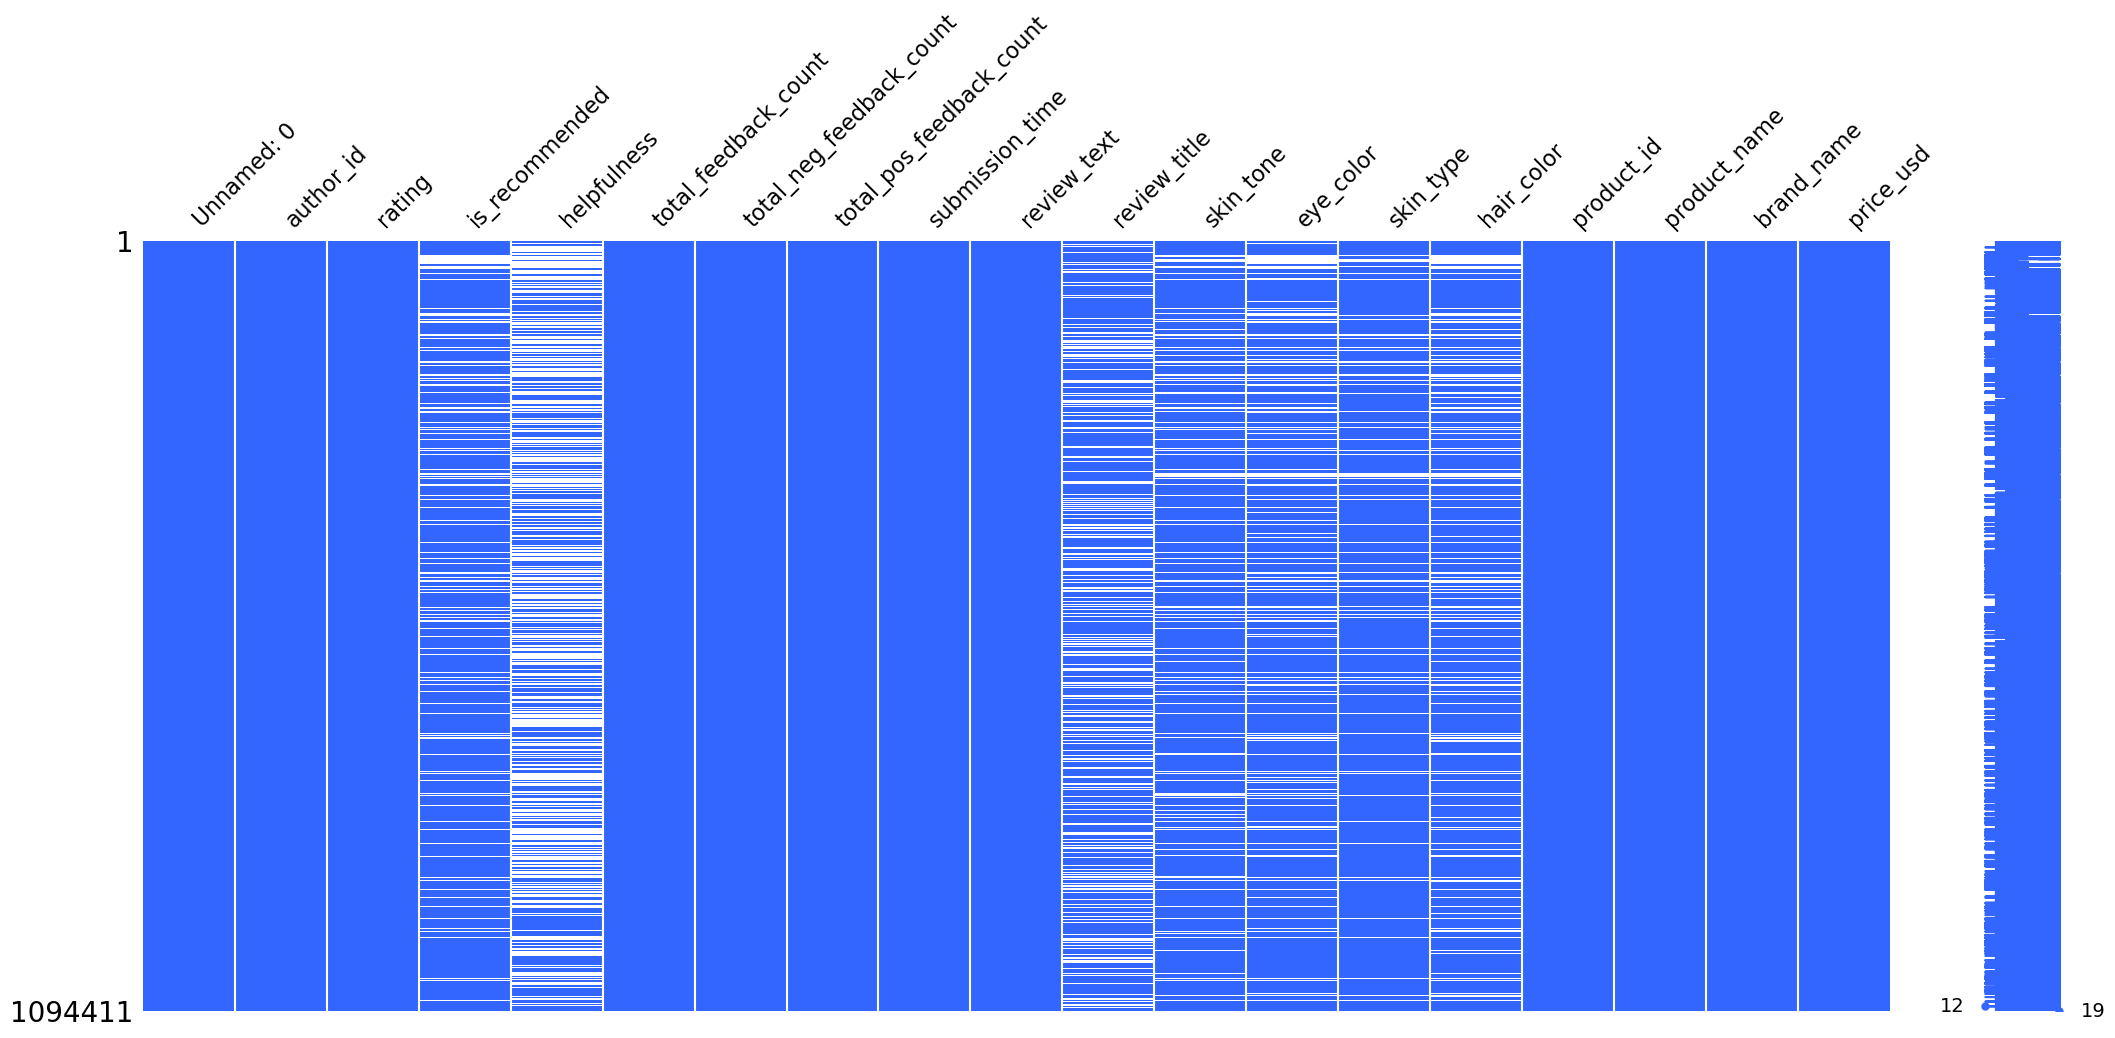

In [63]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df_all_reviews, color=[0.2, 0.4, 1])
plt.show()

In [ ]:
df_all_reviews.dropna(inplace=True, subset=['review_text'])
df_all_reviews.info()

In [ ]:
msno.matrix(df_all_reviews, color=[0.2, 0.4, 1])
plt.show()

## Text Cleaning

In [ ]:
!pip install demoji

In [82]:
import re
import unicodedata as uni
import demoji

url_pattern = re.compile(r"https\S+")
special_char_pattern = re.compile(r"[^\w\s]")

# Remove URL
def remove_urls(text):
    text = url_pattern.sub("", text)
    return text


# Normalize Unicode
def unicode_normalize(text):
    return uni.normalize('NFKD', text)


# Remove special characters
def remove_special_chararcters(text):
    text = special_char_pattern.sub("", text)
    return text

# Remove unuseful space like " Hello   Good Morning. "
def remove_doublespaces(text):
  return " ".join(text.split())


# Clean emoji into text
def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [78]:
!pip install symspellpy

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 4.1 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [symspellpy]
   ---------------------------------------- 2/2 [symspellpy]



In [81]:
import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def correct_spelling(text):
    words = text.split()
    corrected_words = []

    for word in words:
        if word[0].isupper():
            corrected_words.append(word)
            continue

        suggestions = sym_spell.lookup(
            word, 
            Verbosity.CLOSEST, 
            max_edit_distance=2,
            include_unknown=True # If no correction found, keep original
        )
        
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)

    return " ".join(corrected_words)

In [ ]:
!pip install textblob
!pip install pyspellchecker

In [ ]:
!pip install nltk

## Text pre-processing

In [74]:
# import spacy
# import nltk
# from nltk.corpus import stopwords

# def correct_spelling(words):
#   spell = SpellChecker()
#   new_text = ""
#   for word in words:
#     if word[0].isupper():
#       new_text = new_text + word + " "       #for capitalize words for names
#     else:
#       corrected_word = spell.correction(word)
#       new_text = new_text + (corrected_word if corrected_word is not None else word) + " "

#   return new_text


# sp = spacy.load("en_core_web_sm")

# def lemmatization(text):
#   token = sp(text)
#   text = [word.lemma_ for word in token]
#   return text


# def word_tokenizer(text):
#   text = text.lower()
#   return text.split()


# nltk.download('stopwords')
# en_stopwords = set(stopwords.words('english'))
# def remove_stopwords(text):
#   return [word for word in text if word not in en_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install langdetect

In [ ]:
!pip install googletrans

In [71]:
from googletrans import Translator
import asyncio # Import asyncio for running async functions


async def translate_text(text, dest_lang='en'):
    translator = Translator()
    # Await the translate method as it returns a coroutine
    translated = ""
    for word in text.split():
      translated = translated + (await translator.translate(word, dest=dest_lang)).text + " "

    return translated



In [72]:
def preprocess_before_translate(text):
  text = remove_urls(text)
  text = unicode_normalize(text)
  text = handle_emoji(text)
  text = remove_doublespaces(text)
  text = remove_special_chararcters(text)
  text = [word.lower() for word in text]

  text = correct_spelling(text)
  text = word_tokenizer(text)
  text = lemmatization(text)
  text = remove_stopwords(text)
  return text

In [ ]:
def preprocess_after_translate(text):
  text = correct_spelling(text)
  text = word_tokenizer(text)
  text = lemmatization(text)
  text = [word.lower() for word in text]
  text = remove_stopwords(text)
  return text

## Label y

In [ ]:
def label(rating):
    if rating >= 4:
        return 2
    elif rating <= 2:
        return 0
    else:
        return 1

## Sampling

In [102]:
from tqdm import tqdm

sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 https:kaggle.com/ankit_gupta/12321fd 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 ,.!𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠k"

df_all_reviews['combined_text'] = df_all_reviews['review_title'].fillna("") + " " + df_all_reviews['review_text'].fillna("")
df_all_reviews['y'] = df_all_reviews['rating'].apply(label)
min_class_size = 4000
dfSubset = df_all_reviews.groupby('y').apply(
    lambda x: x.sample(n=min_class_size), 
    include_groups=False
).reset_index() 
dfSubset = dfSubset.drop(columns=['level_1'], errors='ignore')

counts = dfSubset['y'].value_counts()
print("Counts per class:")
print(counts)

# translated_text = await translate_text(cleaned_text)
# cleaned_text = preprocess_after_translate(translated_text)




Counts per class:
y
0    4000
1    4000
2    4000
Name: count, dtype: int64


## Preprocess

In [103]:
import spacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

def clean_text(text):
    text = remove_urls(text)
    text = unicode_normalize(text)
    text = handle_emoji(text)
    text = remove_doublespaces(text)
    text = remove_special_chararcters(text)
    text = correct_spelling(text)
    return text.lower()

# Fast Text Cleaning
partially_cleaned_texts = []
for text in tqdm(dfSubset["combined_text"], desc="Text Cleaning"):
    cleaned_text = clean_text(text)
    partially_cleaned_texts.append(cleaned_text)

# Batch Lemmatization & Stopwords
final_clean_texts = []
for text in tqdm(nlp.pipe(partially_cleaned_texts, batch_size=2, n_process=-1), 
                total=len(partially_cleaned_texts), 
                desc="Lemmatizing"):

    tokens = [token.lemma_ for token in text if not token.is_stop and not token.is_space]
    final_clean_texts.append(tokens)

clean_df = pd.DataFrame()
clean_df['y'] = dfSubset['y']
clean_df['review_title'] = dfSubset['review_title']
clean_df['review_text'] = dfSubset['review_text']
clean_df['clean_text'] = final_clean_texts
clean_df.head(10)

Lemmatizing: 100%|██████████| 12000/12000 [02:47<00:00, 71.54it/s] 


,y,review_title,review_text,clean_text
0,0,NaN,"Weird texture, didn’t feel like it gave me a d...","[weird, texture, didst, feel, like, give, deep..."
1,0,NaN,"Not very moisturizing at all, I used it twice ...","[moisturizing, twice, lip, dry, morning, time,..."
2,0,"love the idea, but caused break out",I love the pink bottle and the idea of a light...,"[love, idea, cause, break, love, pink, bottle,..."
3,0,So-so J Lo Beauty,The price point may be right for a luxury skin...,"[soso, j, lo, beauty, price, point, right, lux..."
4,0,$65 for a under eye highlighter?!,I don’t find this eye cream effective yet. It’...,"[eye, highlighter, find, eye, cream, effective..."
5,0,"Pills really, really badly",This product pills really badly. I have tried ...,"[pill, badly, product, pill, badly, try, singl..."
6,0,NaN,Wanted to love it but it stinks like FISH OIL!,"[want, love, stink, like, fish, oil]"
7,0,nothing special,I recently ran out of my cliniqu eyes rich and...,"[special, recently, run, clinic, eye, rich, sw..."
8,0,NaN,"So initially I loved this, as it immediately m...","[initially, love, immediately, skin, dewy, sof..."
9,0,Smells amazing but...,my skin hates it. It is the most drying formul...,"[smell, amazing, skin, hat, drying, formula, v..."


In [104]:
clean_df.to_csv("clean_reviews.csv")